## THE GUARDIAN NEWS HEADLINES DATA ANALYSIS - explanatory notebook
## Final project 02805 Social graph 2019


Link to website: https://miniphant.github.io/socialgraphs/

This notebook contains four parts. The motivational section explains why did we focused on the guardian headlines. 

<h2>Contents</h2>

<b><a href='#Motivation' style="color:black;">Motivation</a><br>
<a href='#Basic'  style="color:black;">Basic Stats</a></b>
> <a href='#Download'  style="color:black;">Part one: Downloading data file</a><br>
> <a href='#data'  style="color:black;">Part two: Data Cleaning and Prepocessing</a><br>
    
<b><a href='#Tools'  style="color:black;">Tools Theory and Analysis</a></b>
> <a href='#Text'  style="color:black;">Part one: The Text Analysis</a><br>
> <a href='#network'  style="color:black;">Part two: The network Analysis</a><br>

<b><a href='#Discussion' style="color:black;" >Discussion</a><br></b>
<b><a href='#Contribution' style="color:black;" >Contribution</a><br></b>
<b><a href='#References' style="color:black;" >References</a><br></b>


<h1> Motivation</h1> <a name="Motivation"></a>

The main idea of this project is to explore the words in the healines of The Guardian online newspaper, and to find the most impactful headline in a given time frame. In this project, we intend to answer the following questions regarding  a proposed framework for network analysis and text analysis.  

- What have they been writng about for the past 14 years?
- What are the main genres/ sub genres are they writing about?
- What are the most important words in the given time span?
- How are the networks builted in relation to the specific key words?
- What are the most important headlines connected to the chosen keywords?
- What is the sentiment for the headlines?


<b>What is your dataset? </b><br>
1. The dataset is from : https://www.theguardian.com/international


<b> Why did you choose this/these particular dataset(s)?</b><br>

2. The Guardian is a global and opennews source, whith a significant amount of data. We think the data is useful for analysis and a powerful source of hidden information. We want to explore many categories of news headlines such as politics, world news, business, global development, UK news and technology
    
<b>What was your goal for the end user's experience?</b><br>

3. The goal for the end user's experience is to explore the most relevant events, persons, and some other ocurrences in especific timelines. At the same time the user will be able to investigate how these topics are related to other topics in the big picture of the international arena. Keywords, categories, subcategories and time are the variables we want to take into account in order to biuld networks and structure the language.

<h1> Basic Stats</h1> <a name="Basic"></a>


<h3>Write about your choices in data cleaning and preprocessing<br></h3>
In this section will expalain the data preprocessing for this project.

- Web scraping
- data cleaning
    - guardianheadlinesOutWGenre.csv (95.9 MB)
- data preprocessing with date time and tokenizing
    -
- data preprocessing with genres
- data preprocessing with years


<h2>PART ONE: DOWNLOADING DATA FILE<a name="Download"></a> 


<h2>Web scraping</h2>

It was impossible to download the entirety headlines, because there is a limit to the maximun of headlines headlines to be downloaded per one access, namely, 200 headlines. We downloaded the headlines from 2005-12-26 to 2019-11-27. The features include datetimes, headlines, categories and sub categories.

In [ ]:
from bs4 import BeautifulSoup
import nltk
from  urllib import request
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize 
import json
import pprint
import datetime
import csv

headlines_guardian={}
k=0
url="https://content.guardianapis.com/search"
api_key="?api-key=###########################" #as API key is private. 

finale_date=datetime.date(2005,12,26)
span=(datetime.date.today()-finale_date).days
with open('C:/Users/Desktop/DTU/social/the_guardian_with_categorizer.csv', 'w',encoding="utf-8") as f:
    for delta in range(span):
        today=datetime.date.today()- datetime.timedelta(days=delta)

        today_str=str(today.year)+'-'+str(today.month)+'-'+str(today.day)
        str(today.day)

        from_date="&from-date="+today_str
        to_date="&to-date="+today_str
        page_size="&page-size=200"
        js=request.urlopen(url+api_key+from_date+to_date+page_size)
        results=json.loads(js.read())['response']['results']# loading in jason file
        print('\r %s : %f percent DONE' % (results[0]['webPublicationDate'][:10],delta/span*100),end='')# for debugging
        for res in results:
            try:
                # webTitle is headlines, pillarName is genre and sectionName is sub genres.
                headlines_guardian[res['webPublicationDate']]=[res['webTitle'],res['pillarName'],res['sectionName']]
                # Datetime
                f.write("%s,%s\n"%(res['webPublicationDate'],headlines_guardian[res['webPublicationDate']]))
            except:
                pass
f.close()

<h2>PART TWO: DATA CLEANING AND PREPROCESSING<a name="data"></a>  

We cleaned the downloaded data and rewrote the data into csv file. We removed all the punctuations, and added the category column and the sub category column. Then the final cleaned data is: 
- guardianheadlinesOutWGenre.csv (95.9 MB)

In [14]:
### We recommend not to run it, as it takes so long.
import re
regex = r'^(-?(?:[1-9][0-9]*)?[0-9]{4})-(1[0-2]|0[1-9])-(3[01]|0[1-9]|[12][0-9])T(2[0-3]|[01][0-9]):([0-5][0-9]):([0-5][0-9])(\.[0-9]+)?(Z|[+-](?:2[0-3]|[01][0-9]):[0-5][0-9])?$'
match_iso8601 = re.compile(regex).match

def validate_iso8601(str_val):
    try:
        if match_iso8601(str_val) is not None:
            return True
    except:
        pass
    return False

with open('the_guardian_with_categorizer.csv', 'r') as reader, open('guardianheadlinesOutWGenre.csv', 'w') as b, open('guardianheadlinesWrongdataWGenre.csv', 'w') as c:
    b.write('DateTime,Headline'+'\n')
    # Read and print the entire file line by line
    lines = reader.readlines()
    for line in lines:
        #extract date
        datetime = line[0:20]
        if validate_iso8601(datetime):
            #extract headline 
            headline = line[21:-1]
            List =headline.split(',')
            subhealine1=List[-2]
            subhealine2=List[-1]
            newheadline=' '
            for key in List:
                if key!= subhealine1 and key!= subhealine2:
                    newheadline+=(key) 
            #Delete all the punctuation
            headlineStrip = re.sub(r'\W+', ' ', newheadline.rstrip())
            #Set Genre Column
            Genre = re.sub(r'\W+', ' ', subhealine1.rstrip())
            #sub genre coloumn
            SubGenre = re.sub(r'\W+', ' ', subhealine2.rstrip())
            #Write headlines to csv file
            newline = datetime+','+ headlineStrip+','+Genre+','+SubGenre
            b.write(newline+'\n')
        else:
            c.write(line + '\n')

In [17]:
import pandas as pd
df = pd.read_csv('guardianheadlinesOutWGenre.csv')
df.head(5)

DateTime                                           Headline  \
0  2019-11-27T14:31:15Z   General election Tories accuse Corbyn of lyin...   
1  2019-11-27T14:26:22Z   US economic growth rate revised up to 2 1 xa0...   
2  2019-11-27T14:14:17Z   The uprooted millions of Europe archive Novem...   
3  2019-11-27T14:09:02Z   Police in Spain find three tonnes of cocaine ...   
4  2019-11-27T14:00:18Z   Fishing nations to lower catch limits for Atl...   

    Genre              SubGenre  
0   News              Politics   
1   News              Business   
2   News            World news   
3   News            World news   
4   News    Global development

<h3>Function to tokenize headlines.</h3>

We created a tokenizing funtion. This function received a text input and returned a tokenised list. Aditionally, the fuction cleans all the numbers, converts all the words into lowercase, removes the stopwords and extracts all the nouns, verbs and adjectives. 

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))
def Clean_TokenizingText(text):
    tokens = []
    text = re.sub(r'\d+', " ", text) # remove all the number
    tokenizer = RegexpTokenizer(r'\w+') # tokenize word
    tokens = tokenizer.tokenize(text)
    tokens = [w.lower() for w in tokens]# set all words in lower case
    tokens = [w for w in tokens if not w in stop_words]# remove stopwords
    tokens = [word for (word, pos) in nltk.pos_tag(tokens)  if(pos[:2] == 'NN' or pos[0:2] =='JJ' or pos[0:2] =='VB' and pos[0:2] !='TO' and  len(word) > 1 )]
    return tokens

<h3>Data preprocessing with date time</h3>

The data was separated into three time spans. 
- dataset from 2006-2010
- dataset from 2011-2015
- dataset from 2016-2019. 

The datetimes were modified to extract year, months, day, hour and date.
- dfGuardian.pkl (113 MB)

In [19]:
### We recommend not to run it, as it takes so long.

# Create a new data frame and write to csv file
import dateutil.parser
from datetime import datetime
T = [dateutil.parser.parse(i) for i in df['DateTime']] 
dfGuardian=pd.DataFrame()
dfGuardian['year'] = [i.year for i in T]
dfGuardian['month'] = [i.month for i in T]
dfGuardian['day'] =[i.day for i in T]
dfGuardian['hour'] =[i.hour for i in T]
dfGuardian['Date'] = [datetime.strftime(i, "%Y-%m-%d") for i in T]
dfGuardian['HeadlineToken' ]=[Clean_TokenizingText(str(i))  for i in df['Headline']]
dfGuardian['Genre']=df['Genre']
dfGuardian['SubGenre']=df['SubGenre']
#dfGuardian.to_csv('TheGuardianData.csv', encoding='utf-8')
dfGuardian.to_pickle('dfGuardian.pkl')

In [16]:
df5 = pd.read_pickle('dfGuardian.pkl')
df5.head(3)

year  month  day  hour        Date  \
0  2019     11   27    14  2019-11-27   
1  2019     11   27    14  2019-11-27   
2  2019     11   27    14  2019-11-27   

                                       HeadlineToken   Genre      SubGenre  
0  [general, election, tories, accuse, corbyn, ly...   News      Politics   
1  [economic, growth, rate, revised, xa, business...   News      Business   
2    [uprooted, millions, europe, archive, november]   News    World news

In [12]:
print('The number of total headlines is ', len(df5.index))
print('The atttributes are' , len(df5.columns.values), '. They are :', [i for i in (df5.columns.values)])

The number of total headlines is  976837
The atttributes are 8 . They are : ['year', 'month', 'day', 'hour', 'Date', 'HeadlineToken', 'Genre', 'SubGenre']


<h3>Grouping headlines by years</h3>

In [12]:
import pandas as pd

df0=pd.DataFrame(df5.groupby([df5.year]).HeadlineToken.count())
df0.reset_index(drop=True)
dfByYear=pd.DataFrame()
dfByYear['year']=df0.HeadlineToken.keys()
dfByYear['Headline_Count']=df0.HeadlineToken.values

yearToken ={}
grp=df5.groupby('year')

for i, group in grp: 
    tokens = []
    #print(grp.get_group(i).HeadlineToken)
    for token in grp.get_group(i).HeadlineToken:
        #print(token)
        tokens.extend(token)
    yearToken[i] = tokens;

dfYearHeadline = pd.DataFrame(yearToken.items(),columns=['Year', 'HeadlineTokenByYear'])
dfYearHeadline['Headline_Count']=dfByYear['Headline_Count']

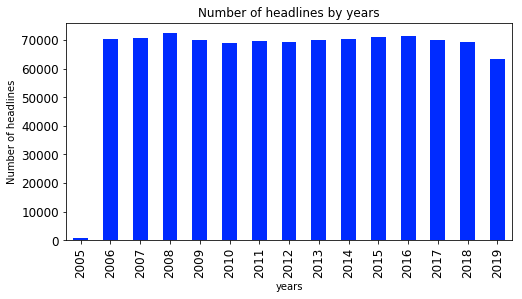

In [13]:
import matplotlib.pyplot as plt
dfYearHeadline.groupby(['Year']).median().plot.bar(figsize=(8,4), color='#002bff', legend=False,fontsize=12)
plt.ylabel('Number of headlines');
plt.xlabel('years');
plt.title('Number of headlines by years')
plt.savefig('./numberOfHlineperYear.png')
plt.show()

<h3> Comments to result</h3>

We grouped the headline data by years and plotted it with bar chart. According to this plot, we can see the headline distributions per year is between 60000 to 70000 except in 2005. The headlines for 2005 was too small in comparison to other years. The final datasets are:
-  dataset from 2006-2010
-  dataset from 2011-2015
-  dataset from 2016-2019

Dividing the data into small datasets to calculate the important keywords form each year for the dataset by TF-IDF tool. 
-  headlines per year present as one document and there are 5 documents in dataset from 2006-2010.
-  headlines per year present as one document and there are 5 documents in dataset from 2011-2015
-  headlines per year present as one document and there are 4 documents in dataset from 2016-2019
 <br>

<h3>Grouping headlines by main genres</h3>

We explored how the headlines distributions in the period of 2005 to 2019 by 5 main genres. There are many headlines in opinion genre which is good data to analysis the sentiment. There are also many headlines in news so that we can extract many important key words through the years from 2005 to 2019.

In [17]:
import pandas as pd
df1=pd.DataFrame(df5.groupby([df5.Genre ]).HeadlineToken.count())
df1.reset_index(drop=True)
df2=pd.DataFrame()
df2['Headline_Count']=df1.HeadlineToken.values
df2['Genre']=df1.HeadlineToken.keys()
df2.head()

Headline_Count        Genre
0          194514        Arts 
1           90734   Lifestyle 
2          442237        News 
3           83162     Opinion 
4          166190       Sport

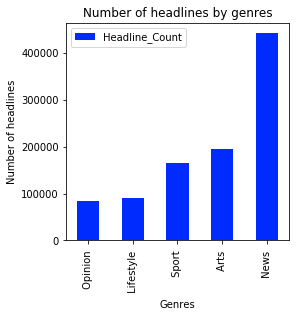

In [25]:
df2.groupby(['Genre']).median().sort_values("Headline_Count").plot.bar(figsize=(4,4),color='#002bff')
plt.ylabel('Number of headlines');
plt.xlabel('Genres');
plt.title('Number of headlines by genres')
plt.savefig('./numberOfHlinebyGenre.png')
plt.show()

<h3>Grouping headlines by sub genres</h3>

We plot a bar chart for sub genres which are including in 5 main genres so that we can investigate how the data is distributed in by sub genres.

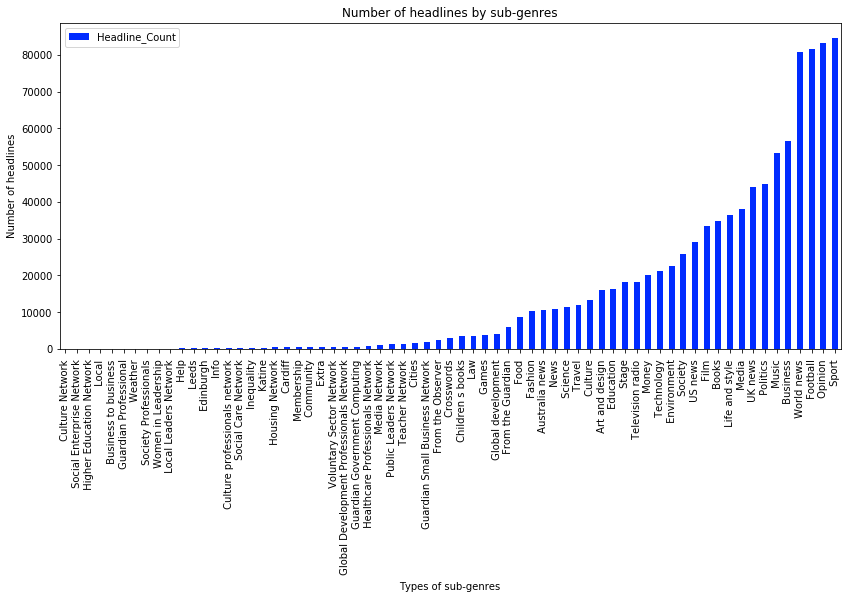

In [24]:
df3=pd.DataFrame(df5.groupby([df5.SubGenre ]).HeadlineToken.count())
df3.reset_index(drop=True)
df4=pd.DataFrame()
df4['Headline_Count']=df3.HeadlineToken.values
df4['SubGenre']=df3.HeadlineToken.keys()
#df4.head()

df4.groupby(['SubGenre']).median().sort_values("Headline_Count").plot.bar(figsize=(14,6),color='#002bff')
plt.ylabel('Number of headlines');
plt.xlabel('Types of sub-genres');
plt.title('Number of headlines by sub-genres')
plt.savefig('./data_subgenre.png')
plt.show()

<h1>Tools, theory and analysis. <a name="Tools"></a>

<h2> PART ONE: THE TEXT ANALYSIS <a name="TEXT"></a> 


Preprocessed and cleaned data is used for this part of text analysis. As all the headlines are tokenized, we can easily count the frequency of the word containing in each document. 

In [4]:
import pandas as pd
df = pd.read_pickle('dfGuardianByYear.pkl')
df.head()

Year                                      HeadlineToken
0  2005  [intel, revamps, image, become, consumer, bran...
1  2006  [great, silence, belle, de, jour, night, museu...
2  2007  [unused, christmas, present, vouchers, gift, r...
3  2008  [saracens, rule, move, cipriani, wage, demands...
4  2009  [luxembourg, po, tamayo, xenakis, complete, or...

<h3>Word clouds for 2018 and 2019 which show the most frequent words in the years.</h3>

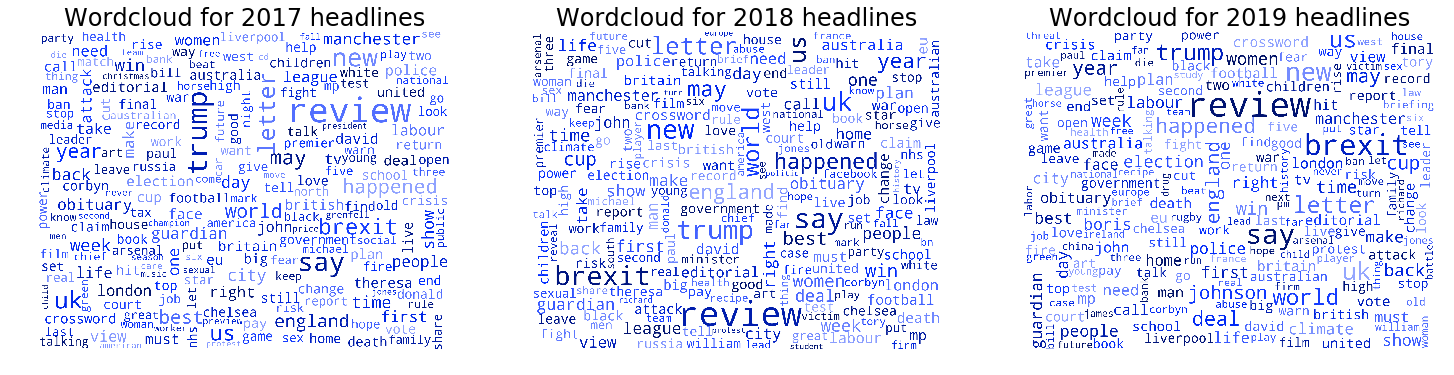

In [5]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
#Colors for wordcloud
def blue_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(20,80))
#Create wordclouds
wc_2017 = ""
wc_2017 = " ".join([word for word in df.HeadlineToken[12]])
wc_2018 = ""
wc_2018 = " ".join([word for word in df.HeadlineToken[13]])
wc_2019 = ""
wc_2019 = " ".join([word for word in df.HeadlineToken[14]])

wc1 = (WordCloud(collocations = False, background_color="white", width=1800, height=1400,
     max_font_size = 150, contour_color='firebrick').generate(wc_2018)).recolor(color_func = blue_color_func)
wc2 = (WordCloud(collocations = False, background_color="white", width=1800, height=1400,
     max_font_size = 150, contour_color='firebrick').generate(wc_2019)).recolor(color_func = blue_color_func)
wc3 = (WordCloud(collocations = False, background_color="white", width=1800, height=1400,
     max_font_size = 150, contour_color='firebrick').generate(wc_2017)).recolor(color_func = blue_color_func)

f = plt.figure( figsize=(25,25), facecolor='w')
f.add_subplot(1,3, 1)
plt.imshow(wc3, interpolation="None")
plt.title("Wordcloud for 2017 headlines",  fontsize=24)
plt.axis("off")

f.add_subplot(1,3, 2)
plt.imshow(wc1, interpolation="nearest")
plt.axis("off")
plt.title("Wordcloud for 2018 headlines", fontsize=24)

f.add_subplot(1,3, 3)
plt.imshow(wc2, interpolation="nearest")
plt.axis("off")
plt.title("Wordcloud for 2019 headlines", fontsize=24)
plt.savefig('./epi_wordcloud.png')
plt.show()

<h3> Comments to result</h3>
We plot a word cloud to see which words are the most frequent words in the years in 2018 and 2019. In the word clouds, we can see many interesting words like 'brexit, 'uk', 'us','trump','world', 'england' and 'election'.

<h1>Tools Theory and Analysis<a name="Tools"></a>


<h2>PART ONE: THE TEXT ANNALYSIS<a name="Text"></a> 

<h2>TF-IDF(Term frequency–inverse document frequency) Analysis</h2>
Compute the TF for headlines per each year.

TF-IDF tool is really good to analysis that which words are most important in the text in the whole document. To implement this, the follwing steps are including in steps. 

1. <b>Calculating TF:</b><br> Frequentcy each term/word occur in a text<br><br>
2. <b>Calculating IDF:</b><br>  logarithmically scaled of the total number of documents by the number of documents containing the term.<br><br>
3. <b>Calculating TF-IDF:</b><br> For each word TF-IDF is calculated by multiplying the words TF-value with the words IDF-value<br><br>

To this project, we would analysis each small datasets as we mentioned in the above. By using this TF-IDF tool, we will choose the best key words and apply these key words in the next network analysis. These TF-IDF results will also be plot in the wordclouds so that we clearly can see the most important words in each headlines datasets.

We calculate the frequency of the terms in each year/ each documents.

In [42]:
from nltk import FreqDist
fdist =[FreqDist(i) for i in df.HeadlineToken]
fdist_sorted=[i.most_common() for i in fdist]
df['TF']= fdist_sorted
df['TF_length']=[len(i) for i in df.TF]
df.head(3)

Year                                      HeadlineToken  \
0  2005  [intel, revamps, image, become, consumer, bran...   
1  2006  [great, silence, belle, de, jour, night, museu...   
2  2007  [unused, christmas, present, vouchers, gift, r...   

                                                  TF  TF_length  
0  [(year, 39), (football, 35), (new, 31), (lette...       2340  
1  [(new, 1717), (letters, 1286), (review, 1195),...      32598  
2  [(new, 1867), (football, 1648), (letters, 1419...      33882

 <h3>Calculate the TF-IDF for time span of years 2006, 2007, 2008, 2009, 2010</h3>

In [123]:
#Create a list contains all documents for 5 years
list_2006_2010 = []
for i in range(1,6):
    for word in df.TF[i]:
        list_2006_2010.append(word[0])
len(list_2006_2010)

179334

In [124]:
#Calculate all the TF-IDF values
import math
N_2006_2010=5
tdidf_2006_2010=[]
for i in range(1,6):
    tfidf_year=[]
    for word in df.TF[i]:
        x = (math.log(N_2006_2010 / list_2006_2010.count(word[0]))*int(word[1]) / len(df.TF[i]))#IDF x TF
        if x != 0:
            tfidf_year.append((word[0],x))
    tdidf_2006_2010.append(tfidf_year)

 <h3>Calculate the TF-IDF for time span of years 2011,2012,2013,2014,2015</h3>

In [126]:
#Create a list contains all documents for 5 years
list_2011_2015 = []
for i in range(6,11):
    for word in df.TF[i]:
        list_2011_2015.append(word[0])

len(list_2011_2015)        

201195

In [127]:
#Calculate all the TF-IDF values
import math
N_2011_2015=5
tdidf_2011_2015=[]
for i in range(6,11):
    tfidf_year=[]
    for word in df.TF[i]:
        x = (math.log(N_2011_2015 / list_2011_2015.count(word[0]))*int(word[1]) / len(df.TF[i]))
        if x != 0:
            tfidf_year.append((word[0],x))
    tdidf_2011_2015.append(tfidf_year)

 <h3>Calculate the TF-IDF for time span of years 2016, 2017, 2018, 2019</h3>

In [90]:
#Create a list contains all documents for 4 years
list_2016_2019 = []
for i in range(11,15):
    for word in df.TF[i]:
        list_2016_2019.append(word[0]) 
len(list_2016_2019) 

164300

In [97]:
#Calculate all the TF-IDF values
import math
N_2016_2019=4 #size of doccuments

tdidf_2016_2019=[]
counter=0
end=sum([len(df.TF[i]) for i in range(11,15)])
for i in range(11,15):
    tfidf_year=[]
    for word in df.TF[i]:
        x = (math.log(N_2016_2019 / list_2016_2019.count(word[0]))*int(word[1]) / len(df.TF[i]))#IDF x TF
        if x != 0:
            tfidf_year.append((word[0],x))
            
        print("\r %f percent DONE"%(counter/end*100.),end='')
        counter+=1
    tdidf_2016_2019.append(tfidf_year)


 99.999391 percent DONE

 <h3>Writing file </h3>
 
We write all the TF-IDF values to pickle files and saved them for retrieving back in later.

In [162]:
dftfidf2006_2010=pd.DataFrame()
dftfidf2006_2010['tfidf'] = tdidf_2006_2010
dftfidf2006_2010.to_pickle('tfidf2006_2010.pkl')

In [161]:
dftfidf2011_2015=pd.DataFrame()
dftfidf2011_2015['tfidf'] = tdidf_2011_2015
dftfidf2011_2015.to_pickle('tfidf2011_2015.pkl')

In [160]:
dftfidf2016_2019=pd.DataFrame()
dftfidf2016_2019['tfidf'] = tdidf_2016_2019
dftfidf2016_2019.to_pickle('tfidf2016_2019.pkl')

<h2> WordClouds</h2>

We plot each TF-IDF values to show the  important words for each documents according to their whole documents in their datasets. Finding a good key word for each data sets is one of our target. Which good key words are to be used to create the network analysis in later.

Before we plot the wordclouds for the TF-IDF values, we quantized the TF-IDF values so that we can get integer values. We created a function to do this.

In [22]:
def get_wordcloud(tokens):
    tfidf = []
    #add multiplier to get integer value
    for (word,number) in tokens:
        tfidf.append((word, int(number * 1000000)))
    
    wc =[]

    for (word,number) in tfidf:
        for i in range(int(number)):
            wc.append(word)
    wctext = " ".join(word for word in wc)

    return wctext

In [23]:
import pandas as pd

df3 = pd.read_pickle('tfidf2006_2010.pkl')
# Create Wordclouds
wc2006=get_wordcloud(df3.tfidf[0])
wc2007=get_wordcloud(df3.tfidf[1])
wc2008=get_wordcloud(df3.tfidf[2])
wc2009=get_wordcloud(df3.tfidf[3])
wc2010=get_wordcloud(df3.tfidf[4])

df4 = pd.read_pickle('tfidf2011_2015.pkl')
wc2011=get_wordcloud(df4.tfidf[0])
wc2012=get_wordcloud(df4.tfidf[1])
wc2013=get_wordcloud(df4.tfidf[2])
wc2014=get_wordcloud(df4.tfidf[3])
wc2015=get_wordcloud(df4.tfidf[4])

df5 = pd.read_pickle('tfidf2016_2019.pkl')
wc2016=get_wordcloud(df5.tfidf[0])
wc2017=get_wordcloud(df5.tfidf[1])
wc2018=get_wordcloud(df5.tfidf[2])
wc2019=get_wordcloud(df5.tfidf[3])

#List them all 
wcList = [wc2006,wc2007,wc2008,wc2009,wc2010,wc2011, wc2012, wc2013, wc2014, wc2015, wc2016, wc2017, wc2018, wc2019]

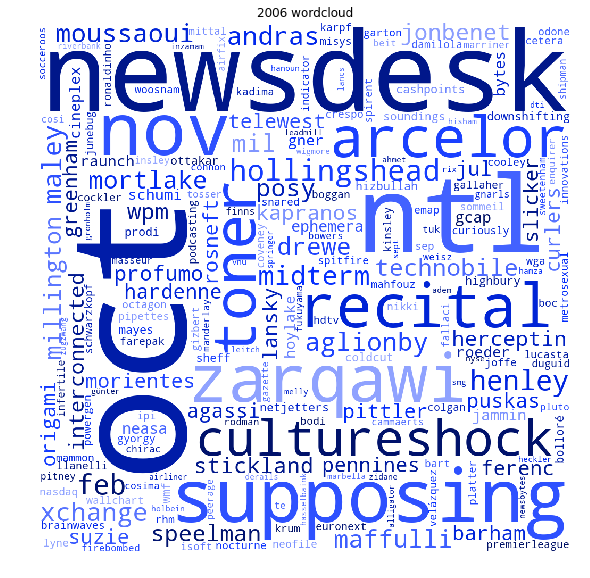

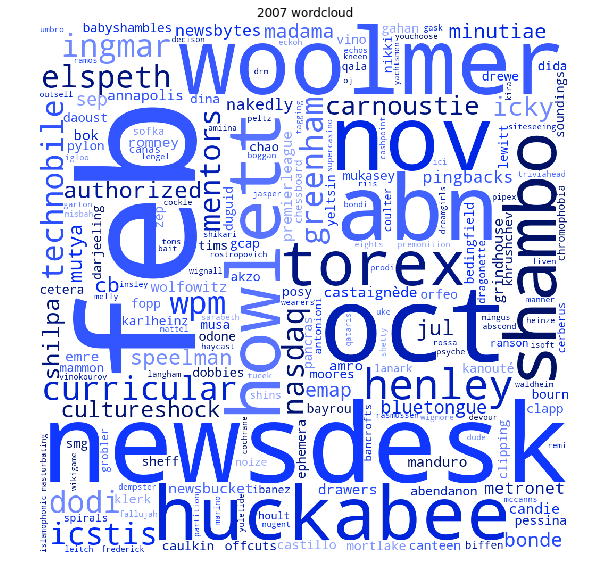

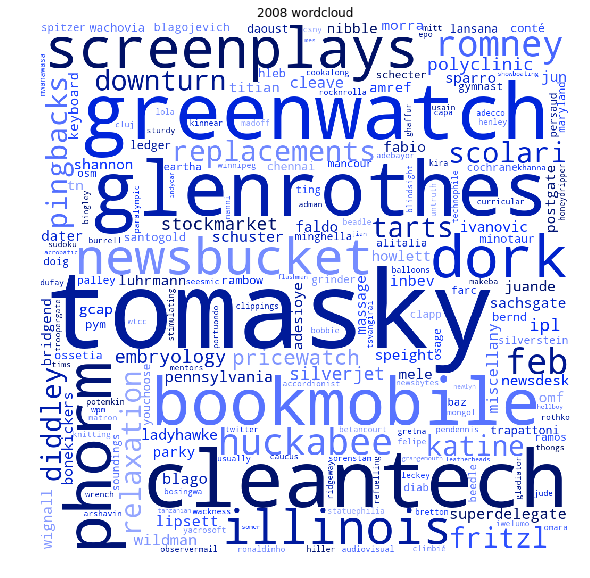

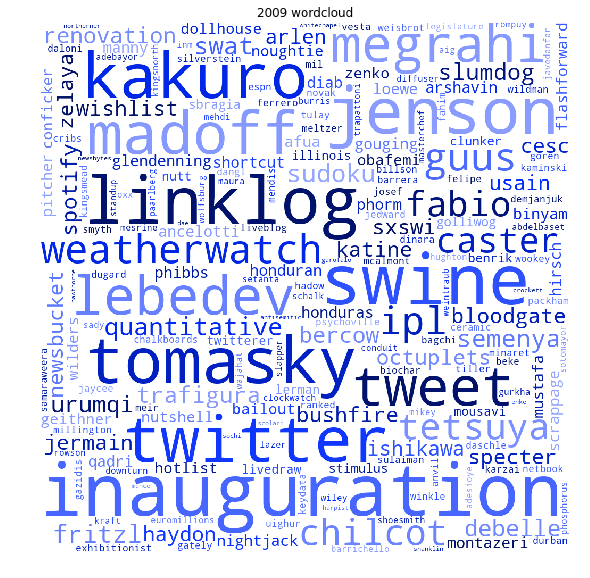

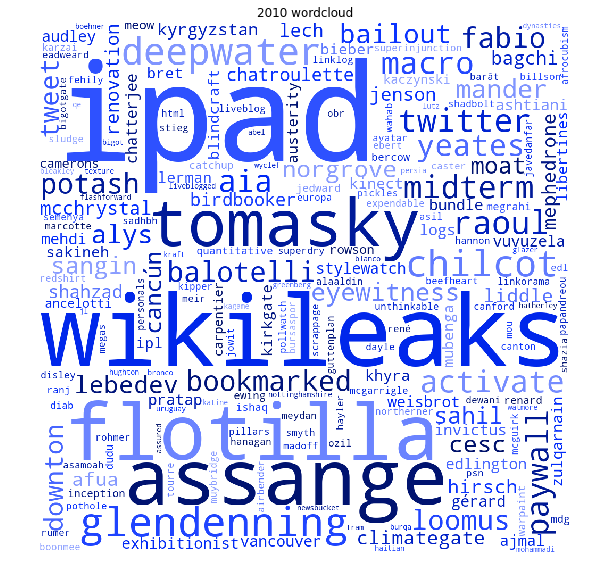

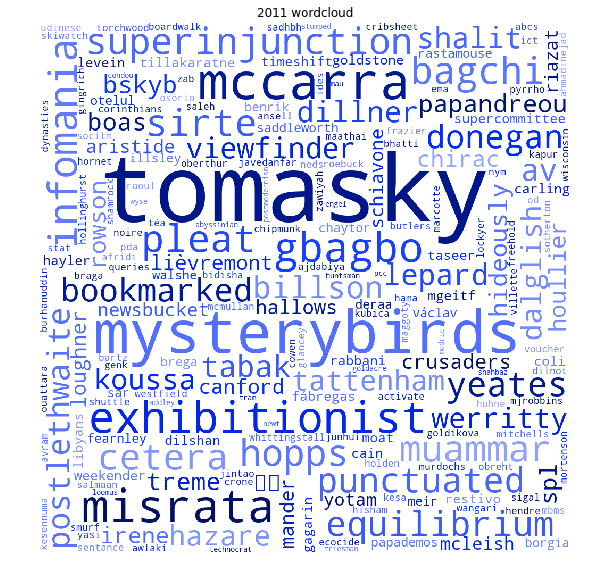

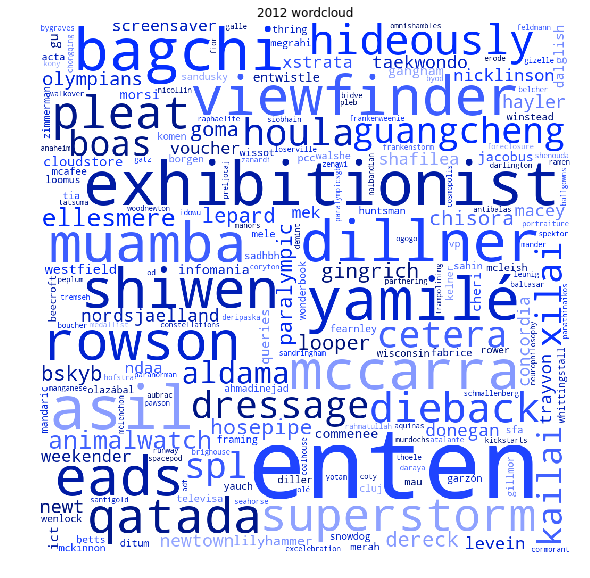

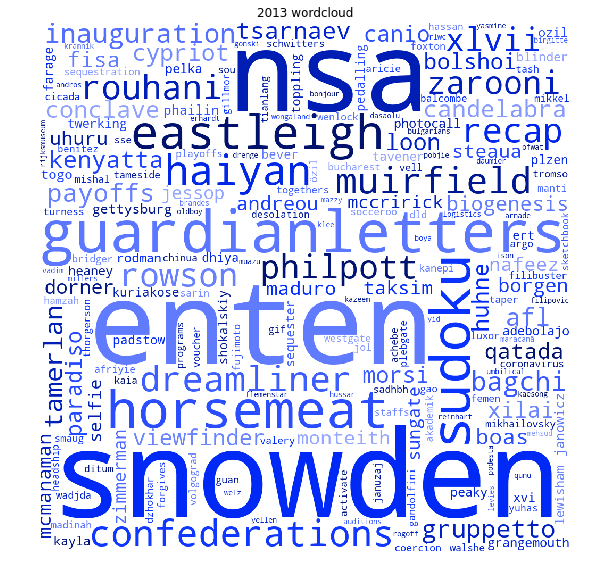

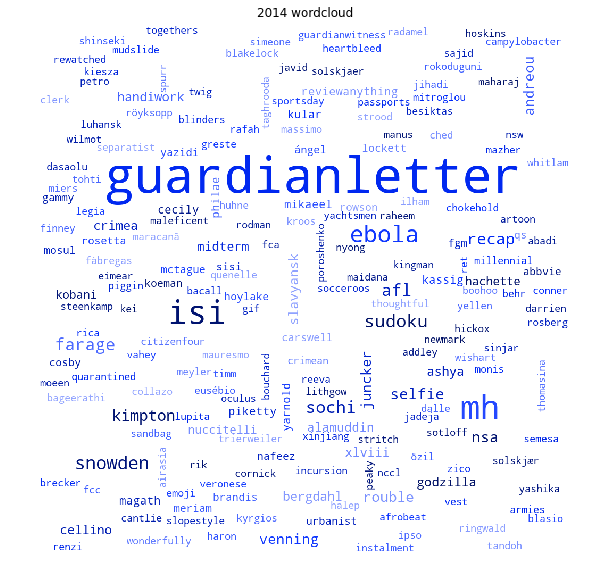

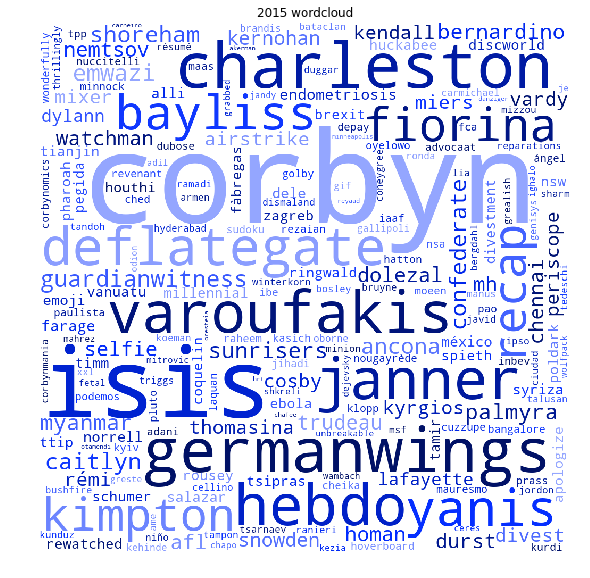

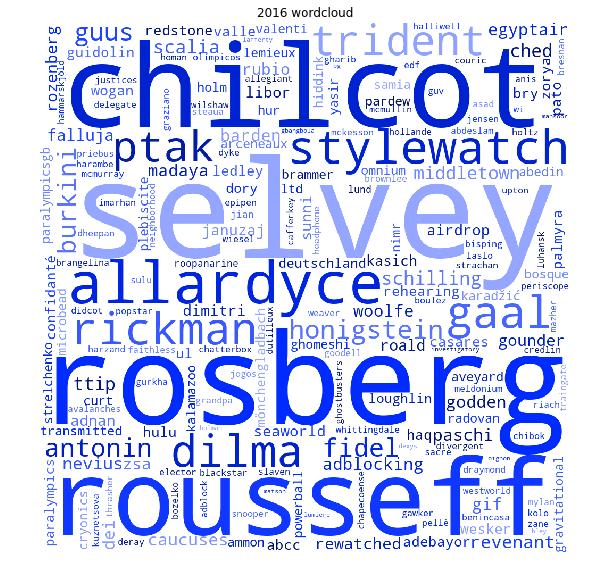

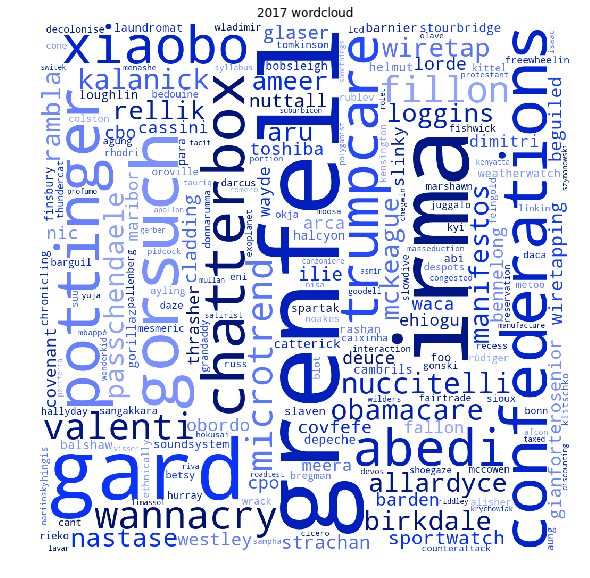

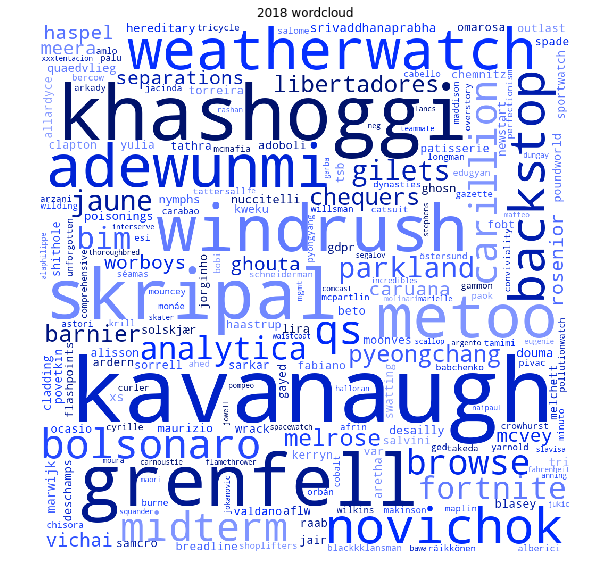

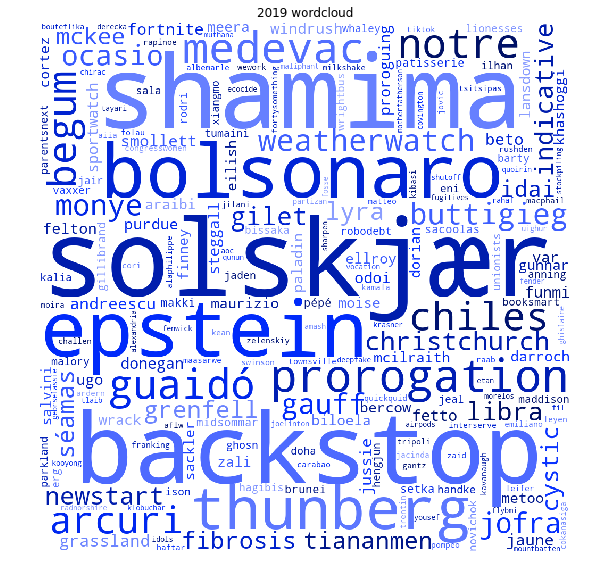

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

#Colors for wordcloud
def blue_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(20,80))

#Create wordcloud
year=2006
for wc in wcList:    
    wordcloudHeadlines = WordCloud(collocations=False, width = 1000, height = 1000, background_color="white").generate(wc)
    wordcloudHeadlines.recolor(color_func = blue_color_func)    
    plt.figure(figsize = (8,14), facecolor = None) 
    plt.imshow(wordcloudHeadlines) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(str(year) +" wordcloud")
    plt.savefig('./word_cloud_'+str(year)+'_test.png')
    plt.show()
    year+=1


<h3> Comments to result </h3>

Finally, we plot all the wordclouds, then we can see many interesting words in the wordclouds. They are exactly what we want to see and what we predicted in before the implementation. In words in many years are explaining what was the most influence topics or what are the most written in the news headlines. For examples,

- 2006 : key words : 'zarqawi', 'moussaoui' - terrorist zarqawi is arrested in 2006, and 9/11 terrorist 'moussaoui' apppeared also in the headlines in that year.

- 2008 :  'romney'and 'Tomasky' appeared frequently, there were campaigns for US election. Tomasky was a theguardian correspondent, and he wrote about politics. Mitt Romney is a US democrat politician.

- 2009 :  important key words : 'inaugration', 'twitter'. Obama was elected in 2009 and his inaugration appeared on the headlines. The twitter users' growth is increased from 6 millions(2008) to 18 millions(2009).

- 2010 : 'Assange','Wikileaks' appeared most in that year. Wikileaks founder was most appeared in the headlines in 2010.

- 2011 : Key words 'Snowden' and 'nsa' appeared most. American whistleblower Edword Snowden leaked information from NSA.

- 2018 : 'metoo' key word appeared as important word. There were metoo campaign last year.




<h2>PART TWO: THE NETWORK ANNALYSIS<a name="network"></a> 


The purpose to this analysis is to find out which headline exists as a center in network made from the headlines and certain keywords that we have been found from TF-IDF analysis. We divided and cleaned dataset by about 5-year timespan.(we used headlines set from 2016 to 2019, from 2011 to 2015 and from 2006 to 2010.) Afterward, using a fixed frequent keyword for each dataset (we used TF-IDF result), we created graphs for each keyword. Headlines are nodes in the networks graphs.

1. <b>Degree centrality: </b> <br>
Degree shows how many "similar" headlines around one headline(one node). The degree centrality is measured by the degree, and furthermore, if a node is close to the center, then the degree will be larger.<br><br>

2. <b>Betweeness centrality: </b> <br>
Betweeness centrality is calculated from the shortest paths going through a certain node. If the betweeness centrality is high, it means the node is connected to many different clusters. If the node(headline) has high centrality, then that node can connect the larger clusters in the network graph. The node with high cetrality tends to contain words that are used in many different clusters or sub genres. <br><br>

3. <b>Eiigenvector centrality: </b> <br>
Eigenvector centrality is high when the node itself has high degree or high degree neighborhood. By eigenvector centrality, we can find hidden node/ hidden headline which acts like the bridge between more important nodes in which they are connecting. We can find the relations of these nodes.<br><br>


Finally, we got degree distributions, betweeness/degree/eigenvector centrality in the following.



In our project, large calculation is needed. Therefore we used caluculation resource from Google.

In [0]:
# Mount to Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import datetime
from google.colab import files
import io

# read dataset
df=pd.read_csv('/content/drive/My Drive/02805data/TheGuardianData.csv')#,encoding="utf-8")

# divide data every three years
df_1619=df[df['year']>2015]
df_1115=df[(df['year']>2010) & (df['year']<2016)]
df_0610=df[(df['year']>2005)&(df['year']<2011)]




We extracted a keyword for each time span using result from TF-IDF.
We choce words that appeared many times in top highest 50 words of TF-IDF list.
To calculate this, we used dataset as below. (pair of a word and score of TF-IDF.)

In [0]:
import pandas as pd
# dataset from 2016 to 2019
df=pd.read_pickle('/content/drive/My Drive/02805data/tfidf2006_2010.pkl')
df.head()

tfidf
0  [(oct, 0.002005818757041745), (newsdesk, 0.001...
1  [(feb, 0.0017187332834343587), (howlett, 0.000...
2  [(tomasky, 0.0021519109816148236), (newsbucket...
3  [(swine, 0.0014609472096455151), (tomasky, 0.0...
4  [(wikileaks, 0.0044579864245473605), (tomasky,...

In [0]:
# find out a keyword(an important word) from each dataset

def keyword_ranking(filename):

  import nltk
  import pandas as pd
  df=pd.read_pickle(filename)
  k_words=[]
  for i in range(len(df)):
    # add top 50 words that is highest TF-IDF value in each year (if filename=tfidf2006_2010.pkl, we get top 50words from 2006,2007 and etc.) to k_words
    k_words.extend(list(dict(list(df.iloc[i])[0]).keys())[:50])
  # return pairs (word, how many times the word appears in top 50 for whole years). e.g. ('allardyce', 3) means 'allardyce' is in top50 three years. 
  return sorted(dict(nltk.FreqDist(k_words)).items(),key=lambda x:-x[1])

p=keyword_ranking('/content/drive/My Drive/02805data/tfidf2006_2010.pkl')
q=keyword_ranking('/content/drive/My Drive/02805data/tfidf2011_2015.pkl')
r=keyword_ranking('/content/drive/My Drive/02805data/tfidf2016_2019.pkl')

metoo is chosen from 2016-2019 as a keyword. We ignored writers name and "common" words like 'sportwatch'.

In [0]:
r[:15] # metoo is chosen from 2016-2019 as a keyword. (we ignored )

[('allardyce', 3),
 ('grenfell', 3),
 ('sportwatch', 3),
 ('meera', 3),
 ('weatherwatch', 3),
 ('metoo', 3),
 ('wrack', 3),
 ('ardern', 3),
 ('barden', 2),
 ('loughlin', 2),
 ('valenti', 2),
 ('slaven', 2),
 ('thrasher', 2),
 ('matteo', 2),
 ('nuccitelli', 2)]

snowden is chosen from 2011-2015 as a keyword.

In [0]:
q[:15] 

[('rowson', 4),
 ('boas', 3),
 ('bagchi', 3),
 ('walshe', 3),
 ('fearnley', 3),
 ('whittingstall', 3),
 ('sadhbh', 3),
 ('voucher', 3),
 ('huhne', 3),
 ('viewfinder', 3),
 ('nsa', 3),
 ('sudoku', 3),
 ('snowden', 3),
 ('recap', 3),
 ('farage', 3)]

twitter is chosen from 2006-2010 as a keyword

In [0]:
p[:15] 

[('newsbytes', 4),
 ('newsbucket', 4),
 ('henley', 3),
 ('feb', 3),
 ('soundings', 3),
 ('garton', 3),
 ('tims', 3),
 ('howlett', 3),
 ('tomasky', 3),
 ('katine', 3),
 ('fabio', 3),
 ('twitter', 3),
 ('oct', 2),
 ('newsdesk', 2),
 ('nov', 2)]

We have selected key words already, then we prepared functions to create graphs.
Nodes are headlines. The way to select nodes is simply whether a headline contains this keyword or not. On the other hand, we built a edge if both nodes has common word. Moreover, edges are weighted in such a way:

- $(\mbox{weight}) = (\mbox{number of common words}) - \arctan(\mbox{time distance})\frac{2}{\pi}+\delta_{\mbox{subgenre1},\mbox{subgenre2}}$

This means the weight is basically the number of common words, but if time distance is large between these headlines it will make the weight decrease. In addition, only if both subgenres are same, weight is added by 1 otherwise not.

We have thousands of nodes,thus we have to calculate $\frac{N(N-1)}{2}$ ($N$ is number of nodes.) times.

Therefore, we  used multi processing. (pool function)

In [0]:
from tqdm import tqdm
import dask.dataframe as dd
from dask.multiprocessing import get
import functools
import math

##########################################################################################################################################
# convert token list into set (preparation of dataframe) that is needed to calculate how many common words are.

# preparation for multithread
# headlines in dataframe is converted from string into set
def set_creater(leng,data_head_i,counter):
    print(counter,end='')
    #print("\r %.3f percent"%(float(counter)/leng*100.),end='')
    return set(data_head_i.replace("'",'').replace(' ','')[1:-1].split(','))

# wrapper
def wrapper_set_creater(args):
  return set_creater(*args)

# main function
def token_to_set(data):
  from multiprocessing import Pool 

  if __name__ == "__main__":
    data_b=data.copy()
    leng=len(data)
    data_head=data_b['HeadlineToken']
   
    couter=0
        
    data_head_list=[]

    print("Percel")
    percel=[[leng,data_head.iloc[i],i] for i in range(leng)]
    print("DONE")
    
    p = Pool(processes=24)
    edge_list=p.map(wrapper_set_creater, percel)
    print("DONE")

    data_b['HeadlineToken']=edge_list
    return data_b
    print('DONE')

#######################################################################################################################

# Extract headlines related to a certain key word
def search_hl_keyword(data,word):
    if(len(word)>0):
        table=data.iloc[[i for i in range(len(data)) if word in list(data['HeadlineToken'].iloc[i])]].copy()
        return table
    else:
        print("ERROR")


########################################################################################################################

# make a graph
# preparation for multithread
# calculate weight of edges 
def add_edge(i,j,data):
    #printf((i,j))
    dicx=dict(data.iloc[i])
    dicy=dict(data.iloc[j])
    
    x=dicx['Unnamed: 0']
    y=dicy['Unnamed: 0']
    timex=datetime.datetime.strptime(dicx['Date'], '%Y-%m-%d')
    timey=datetime.datetime.strptime(dicy['Date'], '%Y-%m-%d')
    time_dist=float(abs(timex-timey).days)
    weight=len(dicx["HeadlineToken"].intersection(dicy["HeadlineToken"]))
    if(dicx["SubGenre"]==dicy["SubGenre"]):
        weight+=1.
    weight=float(weight)
    weight-=math.atan(time_dist)*2/math.pi
    
    
    
    return (x,y,weight)

# wrapper
def wrapper_add_edge(args,data):
  return add_edge(*args,data)

# main function
def df_to_graph(data):
  from multiprocessing import Pool
  if __name__ == "__main__":
    

    G=nx.Graph()


    for i in range(len(data)):
        dic=dict(data.iloc[i])
        G.add_node(dic['Unnamed: 0'])
        print("\r %.3f percent"%(float(i)/len(data)*100.),end='')
    print('NODE DONE')
    print(len(G.nodes))

    counter=0
    i_j=[]
    leng=len(data)
    for i in range(leng-1):
      for j in range(i+1,leng):
        i_j.append([i,j])

    print("percel DONE")
    edge_list=[]
    p = Pool(processes=24)
    edge_list=p.map(functools.partial(wrapper_add_edge, data=data), i_j)
    #result = list(tqdm(edge_list, total=leng*(leng-1)/2))
    print("EDGE DONE")
    print(len(edge_list))
    G.add_weighted_edges_from(edge_list)# if tp[2]!=0)
    print("ADDED")
    return G

########################################################################################################################

# above functions are combined in below function
def create_graph(data,word=''):
    data_2=token_to_set(data).copy()
    if(word==''):
        table=data_2.copy()
    else:
        table=search_hl_keyword(data_2,word)
    G=df_to_graph(table)
    return G


We have alredy made functions needed to make graphs, thus we can excute these for our dataset.

In [0]:
# create graphs from keywords
G_1619=create_graph(df_1619,"metoo")
G_1115=create_graph(df_1115,"snowden")
G_0610=create_graph(df_0610,"twitter")

Percel
DONE
DONE
 99.567 percentNODE DONE
231
percel DONE
EDGE DONE
26565
ADDED
Percel
DONE
DONE
 99.717 percentNODE DONE
353
percel DONE
EDGE DONE
62128
ADDED
Percel
DONE
DONE
 99.756 percentNODE DONE
410
percel DONE
EDGE DONE
83845
ADDED


From the graph, we got transitivity of frequency for each word.
As below,  "me too" is most frequent in 2018, "snowden" appeared suddenly in 2013 and frequency got decrease, and "twitter" get popular gradually from 2016 and suddenly get so frequent around 2009.

FreqDist({2007: 6, 2008: 30, 2009: 197, 2010: 177})

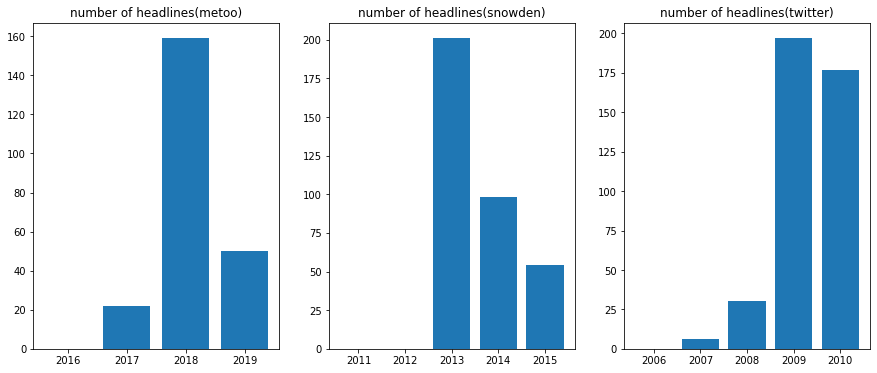

In [0]:
# barplot of how many times these keywords showed up in headlines.

import nltk
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.bar(range(2016,2020),[nltk.FreqDist(list(df.iloc[list(G_1619.nodes())]['year']))[i] for i in range(2016,2020)])
plt.title('number of headlines(metoo)')

plt.subplot(1,3,2)
plt.bar(range(2011,2016),[nltk.FreqDist(list(df.iloc[list(G_1115.nodes())]['year']))[i] for i in range(2011,2016)])
plt.title('number of headlines(snowden)')

plt.subplot(1,3,3)
plt.bar(range(2006,2011),[nltk.FreqDist(list(df.iloc[list(G_0610.nodes())]['year']))[i] for i in range(2006,2011)])
plt.title('number of headlines(twitter)')





Then we plot graphs using force atlas2.

In [0]:
# plotting graphs by forceatlas2, node size is eigenvalue, betweenness or degree centrality

# make subgebre dictionary to convert subgenres into color tuples
import nltk
sgenre_dict=dict([(sg,num)for num,sg in list(enumerate(list(df['SubGenre'].unique())))])
sorted_sg_lst=sorted((nltk.FreqDist(df['SubGenre'])).items(),key=lambda x:-x[1])

def fa2_draw(graph):

  import matplotlib.cm as cm

  # force atlas
  forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning

                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=30.0,

                          # Log
                          verbose=True)

  # draw wikipedia network using node degree

  plt.figure(figsize=(25, 8))
  positions = forceatlas2.forceatlas2_networkx_layout(graph, pos=None, iterations=2000)
  
  col=[cm.hsv(sgenre_dict[df['SubGenre'][int(i)]]/60.) for i in list(graph.nodes())]
  
  plt.subplot(1,3,1)
  nx.draw_networkx_nodes(graph, positions,with_labels=False, node_color=col, alpha=0.5,node_size=[d/6 for n,d in graph.degree(weight='weight')])
  nx.draw_networkx_edges(graph, positions, edge_color="green", alpha=0.005)
  plt.title("degree")

  plt.subplot(1,3,2)
  nx.draw_networkx_nodes(graph, positions,with_labels=False, node_color=col, alpha=0.5,node_size=[d*4000 for n,d in nx.eigenvector_centrality(graph,weight='weight').items()])
  nx.draw_networkx_edges(graph, positions, edge_color="green", alpha=0.005)
  plt.title("eigenvalue")

  plt.subplot(1,3,3)
  nx.draw_networkx_nodes(graph, positions,with_labels=False, node_color=col, alpha=0.5,node_size=[d*5000 for n,d in nx.betweenness_centrality(graph,weight='weight').items()])
  nx.draw_networkx_edges(graph, positions, edge_color="green", alpha=0.01)
  plt.title("betweenness")

  #draw edges
  
  plt.axis('off')
  plt.show()



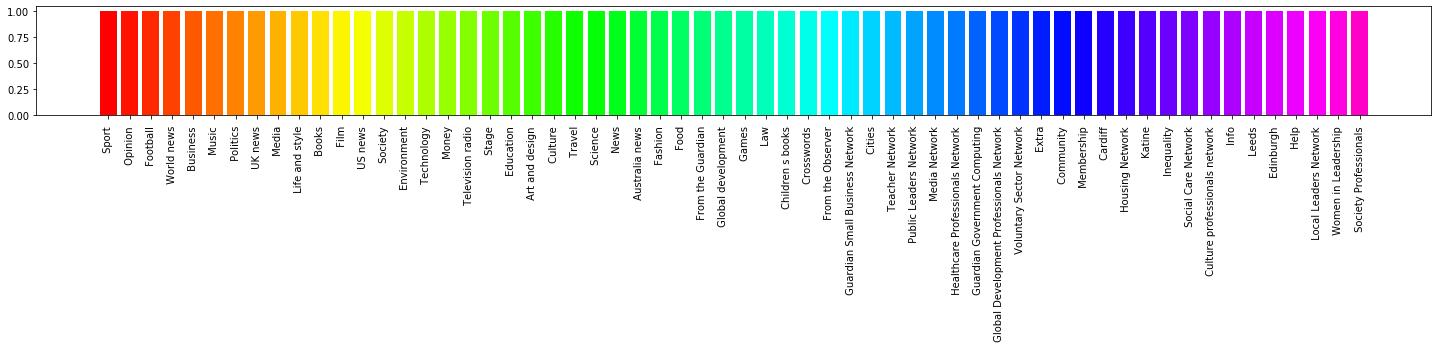

In [0]:
# to show color of each subgenre in next graph 
import matplotlib.cm as cm

sg_col=[(sg,cm.hsv(sgenre_dict[sg[0]]/67.)) for sg in sgenre_dict.items()]
plt.figure(figsize=(25, 2))
ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.bar([sg[0] for sg in sorted_sg_lst[:60]],height=[1 for i in range(60)],color=[c[1] for c in sg_col[:60]])
plt.show()

Below graphs are "me too" graph(2016-2019), "snowden" graph(2011-2015) and "twitter" graph(2006-2010) from the top.
Node sizes are degree, eigenvector and betweeness centrality values and node colors depends on subcategory of each node.

100%|██████████| 2000/2000 [00:02<00:00, 676.24it/s]


BarnesHut Approximation  took  0.56  seconds
Repulsion forces  took  1.15  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.97  seconds
AdjustSpeedAndApplyForces step  took  0.10  seconds


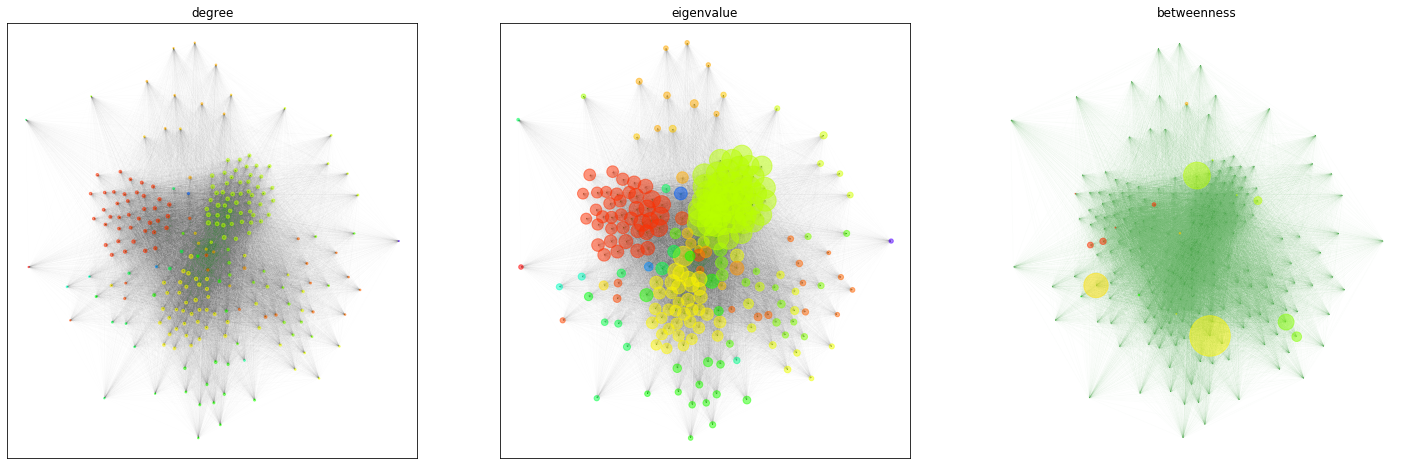

100%|██████████| 2000/2000 [00:06<00:00, 298.55it/s]


BarnesHut Approximation  took  1.32  seconds
Repulsion forces  took  2.67  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  2.27  seconds
AdjustSpeedAndApplyForces step  took  0.15  seconds


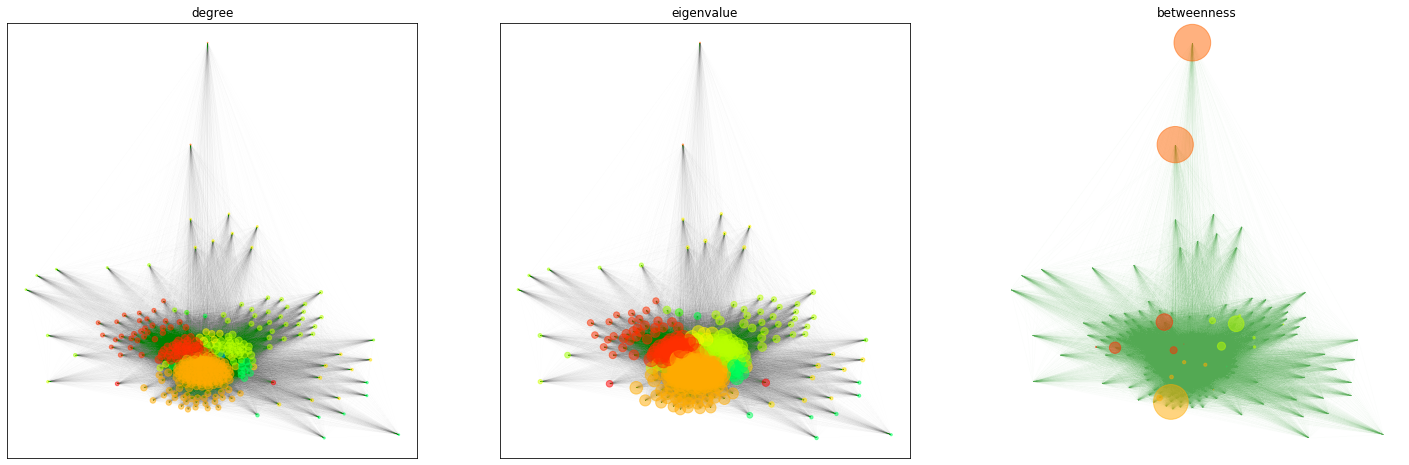

100%|██████████| 2000/2000 [00:07<00:00, 257.31it/s]


BarnesHut Approximation  took  1.66  seconds
Repulsion forces  took  2.56  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  3.04  seconds
AdjustSpeedAndApplyForces step  took  0.18  seconds


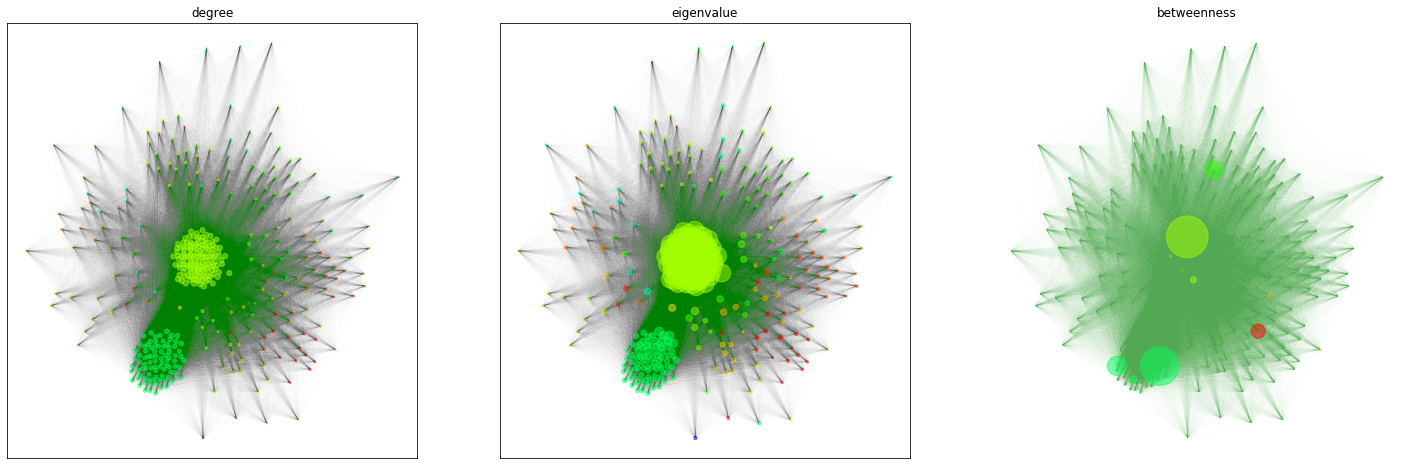

In [0]:
# show graphs
fa2_draw(G_1619)
fa2_draw(G_1115)
fa2_draw(G_0610)


For "me too" graph, the main categories are Opinion(red), US news(yellow) and Society(yellow green).

For "snowden" graph, the main categories are World news(orange red), Media(orange) and Society(yellow green).

For "twitter" graph, the main categories are Technology(yellow green) and Society(darker yellow green).

The graphs below show the degree distribution of 2006-2010,2011-2015 and 2016-2019 graph from the left.

Each graph yielded, some "peaks", for instance, in the left graph there are three peaks.
The number of peaks meet the number of large cluster in above graphs. This is because edge weight is added by 1 when both headline subgenres are same.  

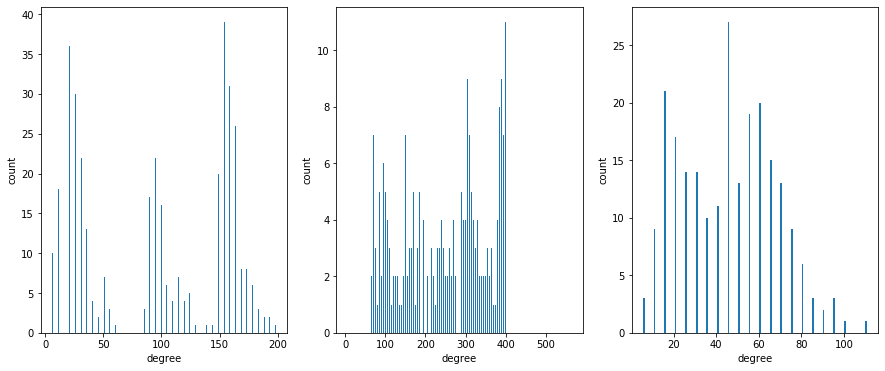

In [0]:
# show degree distribution(weighted)
def draw_distribution(ls):
    import numpy as np
    histo_data=np.histogram(ls,bins=int(max(ls)/5))
    X = []
    for i in range(1, len(histo_data[1])):
        X.append((histo_data[1][i-1]+histo_data[1][i])/2)
    plt.bar(X,histo_data[0])
    plt.xlabel("degree")
    plt.ylabel("count")

plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
draw_distribution(list(dict(G_0610.degree(weight='weight')).values()))
plt.subplot(1,3,2)
draw_distribution(list(dict(G_1115.degree(weight='weight')).values()))
plt.subplot(1,3,3)
draw_distribution(list(dict(G_1619.degree(weight='weight')).values()))


Finally, we got larger size nodes in above graphs, that is top 5 centers in the standpoints of degree, betweeness and eigenvector centrality.

In [18]:
# show top 5 central nodes shown as headline indices (eigen,betweenness and degree)

G_ls=[G_0610,G_1115,G_1619]
hl_top5={}
G_name={0:'twitter',1:'snowden',2:'metoo'}
for i in range(3):
  d={}
  print("keyword: ",end='')
  print(G_name[i])
  # caluculation of eigenvector centrality
  eig_cent=sorted(nx.eigenvector_centrality(G_ls[i],weight='weight').items(),key=lambda x:-x[1])[:5]
  eig_hl=[num for num,val in eig_cent]
  d['eig']=(eig_hl)

  print("eig top5: ",end='')
  print(eig_cent)

  # caluculation of between centrality

  bet_cent=sorted(nx.betweenness_centrality(G_ls[i],weight='weight').items(),key=lambda x:-x[1])[:5]
  print("bet top5: ",end='')
  print(bet_cent)
  bet_hl=[num for num,val in bet_cent]
  d['bet']=(bet_hl)

  deg_cent=sorted(dict(G_ls[i].degree(weight='weight')).items(),key=lambda x:-x[1])[:5]
  print("deg top5: ",end='')
  print(deg_cent)
  deg_hl=[num for num,val in deg_cent]
  d['deg']=(deg_hl)

  hl_top5[G_name[i]]=d

keyword: twitter
eig top5: [(698058, 0.09433241454121824), (720158, 0.0933639768248122), (735045, 0.09072673637958828), (678535, 0.0902465322445124), (690625, 0.08879409640180577)]
bet top5: [(892039, 0.3489500934848267), (854129, 0.2952142959873436), (624234, 0.07333764801764227), (624558, 0.060123927321539865), (813831, 0.04089361906131646)]
deg top5: [(698058, 200.47720627067773), (678535, 194.96308319615963), (720158, 191.56970600015347), (690625, 189.66358201586402), (735045, 187.587350535708)]
keyword: snowden
eig top5: [(378904, 0.09518695422483292), (454009, 0.08951642843550084), (451502, 0.08852591676937643), (332573, 0.08838825172341629), (451722, 0.08827562863533049)]
bet top5: [(280853, 0.2698485927652594), (280896, 0.2635516489683156), (276426, 0.24211667961667963), (453998, 0.05503755503755504), (453989, 0.049663299663299666)]
deg top5: [(378904, 565.9800294797589), (454009, 539.4142593454467), (417835, 532.6190857400783), (451722, 529.9802483387153), (332573, 526.3595069

Above results only showed pairs of index of headline and centrality value. From this we coverted them into headlines.


In [47]:
# show top 5 central nodes shown as headline (eigen,betweenness and degree)

df_rough=pd.read_pickle('/content/drive/My Drive/02805data/dfGuardian.pkl')

cent_type={0:'bet',1:'deg',2:'eig'}
for i in range(3):
  print(G_name[i],end='')
  print(" : ")
  for j in range(3):
    print(cent_type[j])
    for k in range(5):
      print((list(df['Date'][hl_top5[G_name[i]][cent_type[j]]])[k],list(df['SubGenre'][hl_top5[G_name[i]][cent_type[j]]])[k]),end=' ')
      print(list(df_rough['HeadlineToken'][hl_top5[G_name[i]][cent_type[j]]])[k] )
    print()
  print()

twitter : 
bet
('2007-03-11', ' Technology ')  Twitter crowd goes bananas at SXSW 
('2007-09-25', ' Media ')  Do you use Twitter for reporting 
('2010-12-29', ' Media ')  Forecast for 2011 Mark Rock on Twitter s IPO and Arrington leaving TechCrunch 
('2010-12-27', ' Life and style ')  What happened next The student followed by Kanye West on Twitter 
('2008-04-17', ' Politics ')  Highlights of Gordon Brown s US visit as posted by his aides on Twitter 

deg
('2009-12-01', ' Technology ')  Twitter Facebook and Google turn red for World Aids Day 
('2010-03-16', ' Technology ')  Traffic to Twitter and Facebook fell in February in US says Compete 
('2009-08-06', ' Technology ')  Twitter Facebook Google and LiveJournal under attack 
('2010-01-12', ' Technology ')  How Facebook and Twitter could save us from dreaded email overload 
('2009-05-21', ' Technology ')  A good day for phishing on Facebook and Twitter 

eig
('2009-12-01', ' Technology ')  Twitter Facebook and Google turn red for World

As we expained above,

- if degree centrality is high, the node contains important frequent word (kind of main topics).

- if betweeness centrality is high, the node contains important frequent word in various cluster.

- if eigenvector centrality is high, the node can be a bridge or conecctor between main topics.

In these results, betweenness centrality tends to contain elements that are not significantly related to our keywords. For example, results for "snowden" contains another "snowden". (she is musician!) However, it also shows how the keyword influence various sides of society.
That is because betweeness centrality tend to be larger when the node is between relatively large cluster by definition, that is, the node tend to connect various subgenre nodes.

On the other hand, results from degree centrality and eigenvector centrality are almost same. That is from the way to make a graph, that is, since nodes in same subcategory are connected, the largest degree nodes tend to be in the largest cluster.(dominant cluster in a graph) In short, size of subgenre is main factor of both centrality.(effect from node degree is too large to find a "bridge" between main topics.)

It is plausible that by manipulating parameters on the edge function, we could get different results.

Concerned with each headline, twitter is always mentioned with facebook. Their social activities are somettimes coincidence and it is plausible that both active users somehow related.

To say about snowden, almost all large topics about him is covered.(Leak, wikileaks and presidential election.) Unfortunately, another "snowde" is contained in some results, however, it still show how he influence the world.(He also appeared World news.(not US news!))

About "metoo", betweenness centrality shows that many cultual person(writer,movie director,poet and etc) reatcted to this movement. In degree centrality, it shows that opinion from male and from female are close-upped, and futhermore, eigenvalue centrality shows middle topics between main topics.(e.g. article about boardrooms is obviously related to gender, but inaddition, it is about deeper problem of our society.) 


<h2>PART THREE: THE SENTIMENT ANNALYSIS<a name="network"></a> 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Dataset_S1.txt', sep= "\t", skiprows=[0,1,2])
happy = df.drop(['twitter_rank', 'google_rank', 'nyt_rank', 'lyrics_rank'], axis= 1)
happy.head()

word  happiness_rank  happiness_average  happiness_standard_deviation
0   laughter               1               8.50                        0.9313
1  happiness               2               8.44                        0.9723
2       love               3               8.42                        1.1082
3      happy               4               8.30                        0.9949
4    laughed               5               8.26                        1.1572

In [ ]:
def get_sentiment(tokens):
    values = []
    words = [word for word in happy['word']]
    for token in tokens:
        token_val = 0
        if(token in words):
            token_val = happy[happy['word']==token]['happiness_average'].values[0]
        values.append(token_val)
    sentiment = np.sum(values)
    return sentiment

In [ ]:
h_one = []

for headline in hl.HeadlineToken[1]:
    sentiment = get_sentiment(headline) 
    h_one.append(sentiment)

In [ ]:
h_eight = []

for headline in hl.HeadlineToken[8]:
    sentiment = get_sentiment(headline) 
    h_eightt.append(sentiment)

In [ ]:
h_thirteen = []

for headline in hl.HeadlineToken[1]:
    sentiment = get_sentiment(headline) 
    h_thirteen.append(sentiment)

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(h_one, hist= False,  color="#01366e",label="2006")
sns.distplot(h_eight, hist= False,  color="#026ddd",label="2009")
sns.distplot(h_fifteen, hist= False,  color="80b6ee",label="2018")


plt.show()

The graph is shown on the the website, due to the fact that it was made on an sketch notebook and took a ridiculous amount of time to run. This basic sentiment analysis shows the dsentiment distribution for the years were the keywords appear. 

<h1>Discussion<a name="Discussion"></a>


1. <b>What went well? </b><br> Both text analysis and network analysis were . We got good important keywords which we can used to build networks with TFIDF tool. We got good results with network analysis tools 'Betweeness', 'eigenvector' and 'Centrallity'.The initial downloading if the data was rather troublesome in the beggining, but finally we were able to extract arobust set of data<br><br>

2. <b>What is still missing? what could be improved? Why? </b><br> And an analysis using cosine similarity for TF-IDF values could be very interesting, as we could be able to see how relevant words are changing from one year after another. Furthermore, the word similaruty in the headlines per year could be monitored. Another interesting analysis would be a gramatical deconstruction of the corpus to determine if the discourse of the news has changed overtime, by analyzing the language and its complexity. Also it would be important to generate other types of language measures, such as: aggressiveness, trustworthiness and neutrality.<br><br> 

2. <b>What did we learned from the project process? </b><br>So Finding a good idea and a good set of data crucial for the project, especially in the first stages. Our experiences tought us that many hours can be devoted to the download of non relevant data, from sources that are not representative or applicable to the idea. Figuring out a good angle to analyse the data is also important, which should be the primary variables? which should be the secondary?, in our case we had to find out how to download the data with the respective categories in ouder to make our analysis meaningful.  <br><br>



<h1>Contribution<a name="Contribution"></a>



- Website : Laura
- Explainer notebook : Takuya & Esther
    - motivation : Esther & Takuya
    - Basic stats : Esther & Takuya
        - web scraping/ downloading data file + code: Takuya
        - Data Cleaning and preprocessing from downloaded data + code : Esther
    - Tools, theory and analysis : Takuya & Esther
        - Text analysis + code: Esther
        - Network analysis + code : Takuya
        - Sentiment analysis + code: Laura
    - Discussion : Esther & Takuya & Laura
    

<h1>References<a name="References"></a>

- https://github.com/suneman/socialgraphs2019/wiki
- https://www.theguardian.com/international
- https://www.thebalancecareers.com/twitter-statistics-2008-2009-2010-2011-3515899
- https://content.guardianapis.com/search
- https://en.wikipedia.org/wiki/Centrality
- https://en.wikipedia.org/wiki/Eigenvector_centrality